In [1]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

C:\Users\RUBYu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import smtplib
from matplotlib import style
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
#sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import time
import datetime 
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification

In [14]:
# Load dataset information
dt= pd.read_csv('Desktop/xAPI-Edu-Data.csv')
dt.shape

(480, 17)

In [15]:
dt.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [17]:
dt.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [19]:
dt.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [20]:
dt.select_dtypes(include=['object']).columns.values

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'], dtype=object)

In [21]:
dt.select_dtypes(include = ['float64', 'int64']).columns.values

array(['raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion'], dtype=object)

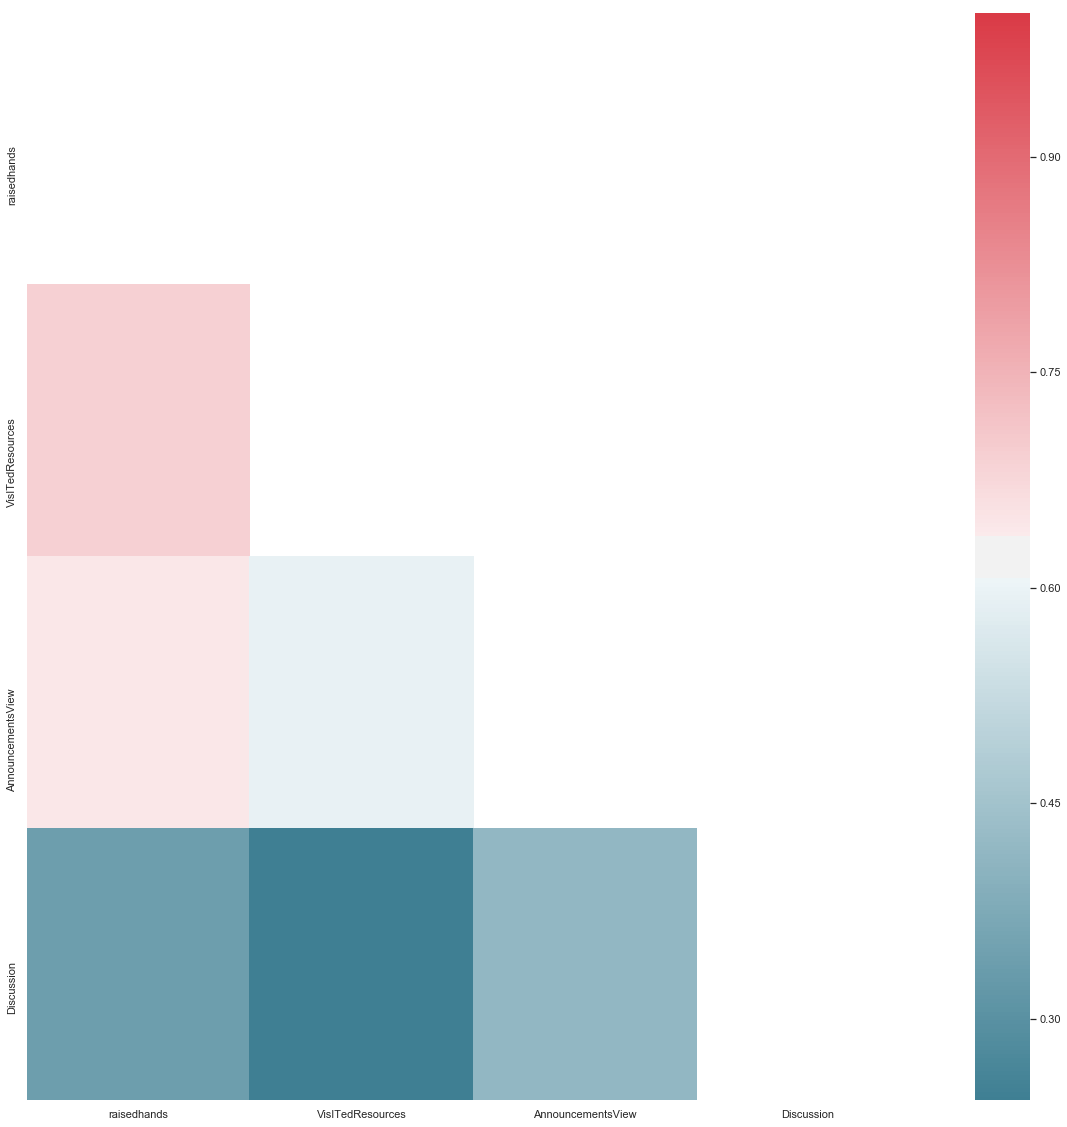

In [23]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(20, 20))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

variable_correlations = dt.corr()
#variable_correlations
heat_map(variable_correlations)

C:\Users\RUBYu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\RUBYu\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\RUBYu\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\RUBYu\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\RUBYu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarnin

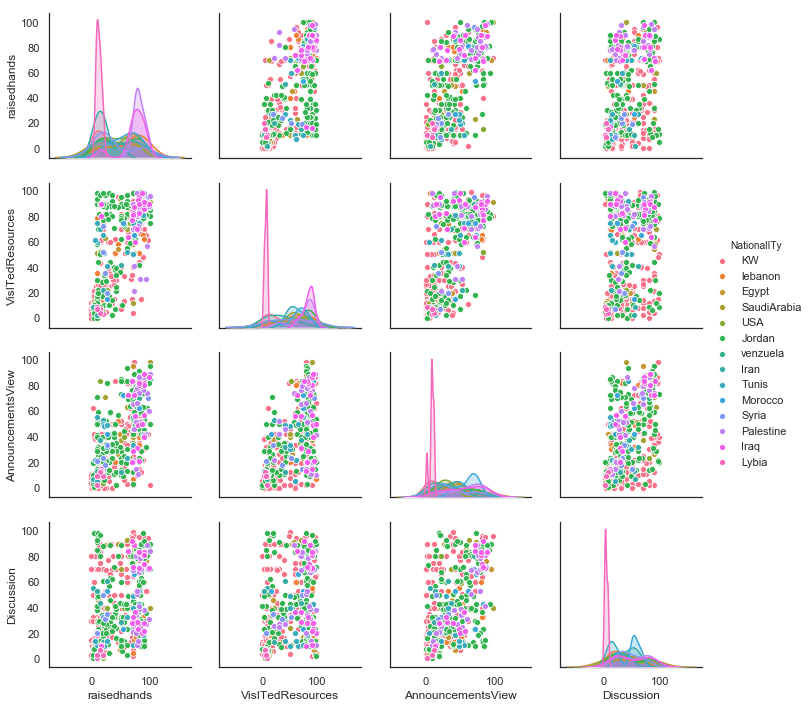

In [24]:
dt_small = dt[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'NationalITy']]
sns.pairplot(dt_small, hue='NationalITy')

In [34]:
map_dt = {"gender":{"M":1,"F":2}, "NationalITy" :{ "Iran": 1,"SaudiArabia": 2,"USA": 3,"Egypt": 4,"Lybia": 5,"lebanon": 6,
          "Morocco": 7,"Jordan": 8,"Palestine": 9,"Syria": 10,"Tunis": 11,"KW": 12,"uwaIT": 12,"Iraq":13,"venzuela": 14},
'PlaceofBirth':{'Iran': 1,'SaudiArabia': 2,'USA': 3,'Egypt': 4,'Lybia': 5,'lebanon': 6,'Morocco': 7,'Jordan': 8,'Palestine': 9,'Syria': 10,'Tunis': 11,'KW': 12,'KuwaIT': 12,'Iraq': 13,'venzuela': 14},
    'StageID':{'HighSchool':1, 'lowerlevel':2, 'MiddleSchool':3},
'GradeID' :  {'G-02':2,'G-08':8, 'G-09':9,'G-04':4,'G-05':5, 'G-06':6,'G-07':7,'G-12':12,'G-11':11,'G-10':10},
'SectionID':{'A':1, 'C':2,'B':3},
'Topic': {'Biology' : 1,'Geology' : 2,'Quran' : 3,'Science' : 4,'Spanish' : 5,'IT' : 6,'French' : 7,'English' :8,
                 'Arabic' :9,'Chemistry' :10,'Math' :11,'History' : 12},
'Semester':{'S':1, 'F':2}, 
'Relation': {'Mum':2, 'Father':1} ,
'ParentAnsweringSurvey': {'Yes':1,'No':0},
'ParentschoolSatisfaction': {'Bad':0, 'Good':1},
'StudentAbsenceDays': {'Under-7':0,'Above-7':1},
'Class':{'H':10,'M':5,'L':2}
          }

dt.replace(map_dt,inplace=True)

In [35]:
dt.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,12,12,2,4,1,6,2,1,15,16,2,20,1,1,0,5
1,1,12,12,2,4,1,6,2,1,20,20,3,25,1,1,0,5
2,1,12,12,2,4,1,6,2,1,10,7,0,30,0,0,1,2
3,1,12,12,2,4,1,6,2,1,30,25,5,35,0,0,1,2
4,1,12,12,2,4,1,6,2,1,40,50,12,50,0,0,1,5


In [36]:
dt.isnull().sum().sort_values(ascending=False)

Class                       0
Semester                    0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Relation                    0
StudentAbsenceDays          0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
gender                      0
dtype: int64

C:\Users\RUBYu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


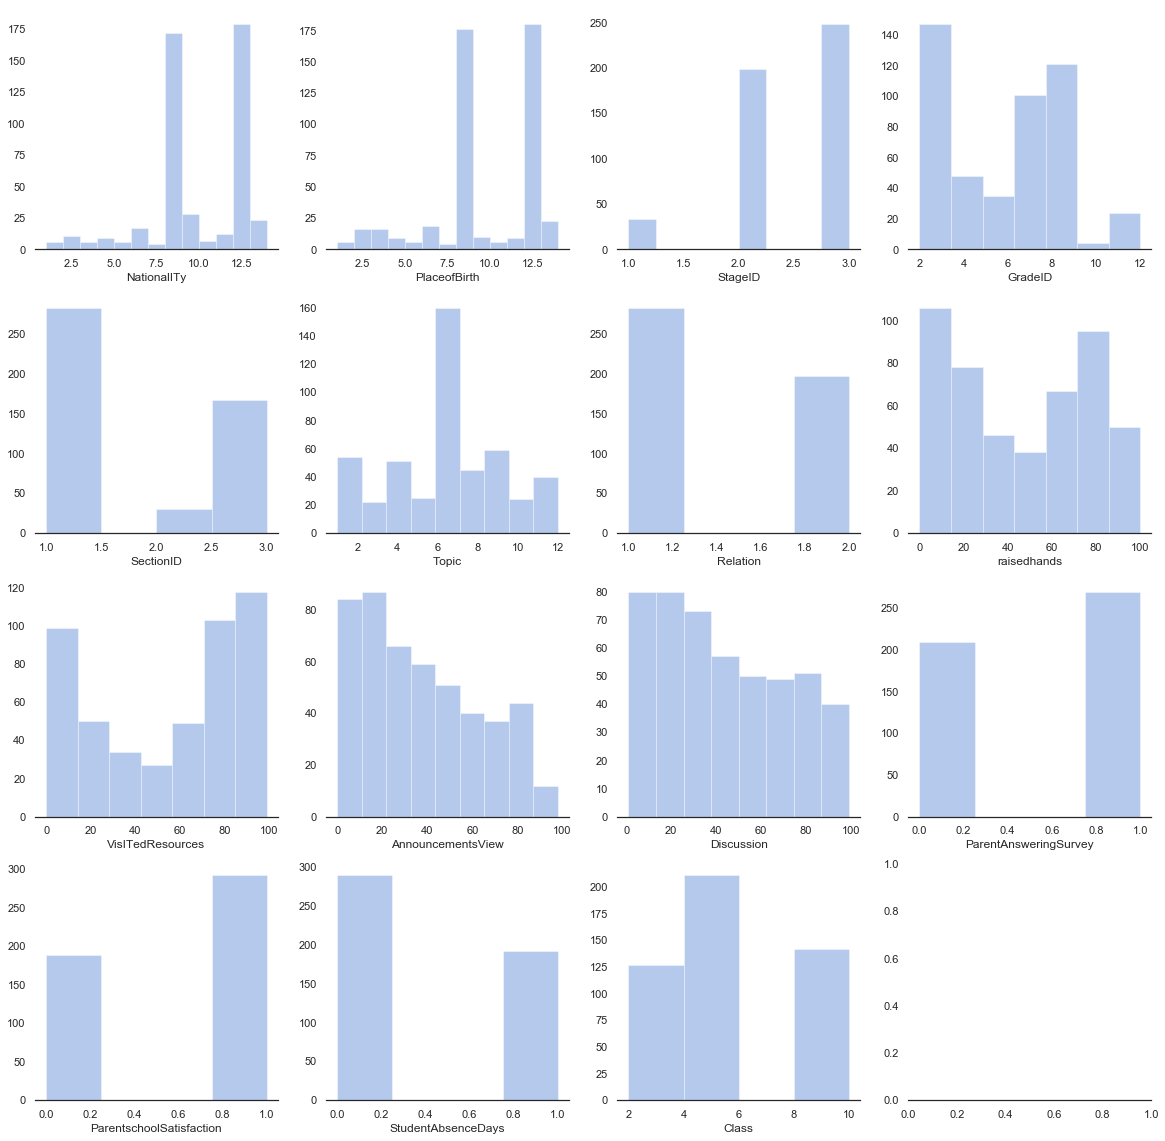

In [41]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(4, 4, figsize=(20,20))
sns.despine(left=True)
sns.distplot(dt['NationalITy'],  kde=False, color="b", ax=axes[0, 0])
sns.distplot(dt['PlaceofBirth'],        kde=False, color="b", ax=axes[0, 1])
sns.distplot(dt['StageID'],        kde=False, color="b", ax=axes[0, 2])
sns.distplot(dt['GradeID'],        kde=False, color="b", ax=axes[0, 3])
sns.distplot(dt['SectionID'], kde=False, color="b", ax=axes[1, 0])
sns.distplot(dt['Topic'],  kde=False, color="b", ax=axes[1, 1])
sns.distplot(dt['Relation'],     kde=False, color="b", ax=axes[1, 2])
sns.distplot(dt['raisedhands'],  kde=False, color="b", ax=axes[1, 3])
sns.distplot(dt['VisITedResources'],      kde=False, color="b", ax=axes[2, 0])
sns.distplot(dt['AnnouncementsView'],      kde=False, color="b", ax=axes[2, 1])
sns.distplot(dt['Discussion'],    kde=False, color="b", ax=axes[2, 2])
sns.distplot(dt['ParentAnsweringSurvey'],    kde=False, color="b", ax=axes[2, 3])
sns.distplot(dt['ParentschoolSatisfaction'],kde=False, color="b", ax=axes[3, 0])
sns.distplot(dt['StudentAbsenceDays'],       kde=False, color="b", ax=axes[3, 1])
sns.distplot(dt['Class'],      kde=False, color="b", ax=axes[3, 2])


In [42]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [43]:
df_copy = pd.get_dummies(dt)

df1 = df_copy
y = np.asarray(df1['ParentschoolSatisfaction'], dtype="|S6")
df1 = df1.drop(['ParentschoolSatisfaction'],axis=1)
X = df1.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50)

radm = RandomForestClassifier()
radm.fit(Xtrain, ytrain)

clf = radm
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(df1.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , 
                                      indices[f], 
                                      df1.columns[indices[f]], 
                                      radm.feature_importances_[indices[f]]))

Feature ranking:
1. feature 10 VisITedResources (0.253298)
2. feature 13 ParentAnsweringSurvey (0.170126)
3. feature 9 raisedhands (0.148302)
4. feature 12 Discussion (0.086007)
5. feature 6 Topic (0.060066)
6. feature 11 AnnouncementsView (0.049055)
7. feature 2 PlaceofBirth (0.046907)
8. feature 4 GradeID (0.044591)
9. feature 1 NationalITy (0.026865)
10. feature 5 SectionID (0.025217)
11. feature 3 StageID (0.023390)
12. feature 15 Class (0.020526)
13. feature 8 Relation (0.016055)
14. feature 0 gender (0.013430)
15. feature 14 StudentAbsenceDays (0.011452)
16. feature 7 Semester (0.004713)


In [44]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [45]:
classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('ExtraTreeClassifier', ExtraTreeClassifier()),
               ('LogisticRegression', LogisticRegression()),
               ('GaussianNB', GaussianNB()),
               ('BernoulliNB', BernoulliNB())
              ]
allscores = []

In [48]:
x, Y =dt.drop('ParentschoolSatisfaction', axis=1), np.asarray(dt['ParentschoolSatisfaction'], dtype="|S6")

for name, classifier in classifiers:
    scores = []
    for i in range(20): # 20 runs
        roc = cross_val_score(classifier, x, Y)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

RandomForestClassifierG 0.6454350674505513
RandomForestClassifierE 0.6618723591090797
AdaBoostClassifier 0.6314489009987369
ExtraTreesClassifier 0.6686703704246261
KNeighborsClassifier 0.644144302511817
DecisionTreeClassifier 0.6771618886479941
ExtraTreeClassifier 0.6113745654127116
LogisticRegression 0.7208142082373011
GaussianNB 0.7128189414951105
BernoulliNB 0.7749700509134471


In [55]:
from sklearn.neighbors import KNeighborsClassifier                                                                           
from sklearn import metrics                                                                                                  
from sklearn import tree                                                                                                     
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor                                                       
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB                                                       
from sklearn.svm import SVC, LinearSVC , SVR                                                                                 
from sklearn.linear_model import Perceptron, LogisticRegression, LinearRegression                                            
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor                                                    
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier                                                       
from sklearn.cross_validation import KFold, train_test_split, cross_val_score                                                
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

C:\Users\RUBYu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\RUBYu\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.20)
sizes=[]
names = ["KNN", "Logistic Regression","Linear SVM",
         "Decision Tree", "Random Forest", "AdaBoost","Naive Bayes"]

classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()
]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    # ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    score = accuracy_score(pred,y_test)
    print("-----",name,"-----")
    result = (score*100)
    sizes.append(result)
    print("Score: %.2f %%"%(score*100))

----- KNN -----
Score: 61.46 %
----- Logistic Regression -----
Score: 75.00 %
----- Linear SVM -----
Score: 64.58 %
----- Decision Tree -----
Score: 66.67 %
----- Random Forest -----
Score: 76.04 %
----- AdaBoost -----
Score: 70.83 %
----- Naive Bayes -----
Score: 62.50 %


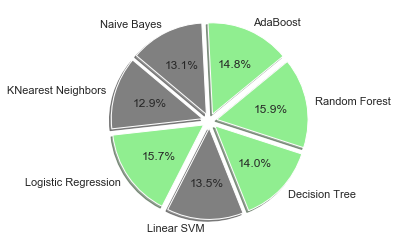

In [59]:
sizes=sizes
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'KNearest Neighbors','Logistic Regression', 'Linear SVM','Decision Tree', 'Random Forest', 'AdaBoost','Naive Bayes'

explode = (0.08, 0.08, 0.08, 0.08,0.08,0.08,0.08)
colors = ['grey', 'lightgreen', 'grey', 'lightgreen','lightgreen','lightgreen','grey']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140,colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

C:\Users\RUBYu\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\RUBYu\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<Figure size 1080x720 with 0 Axes>

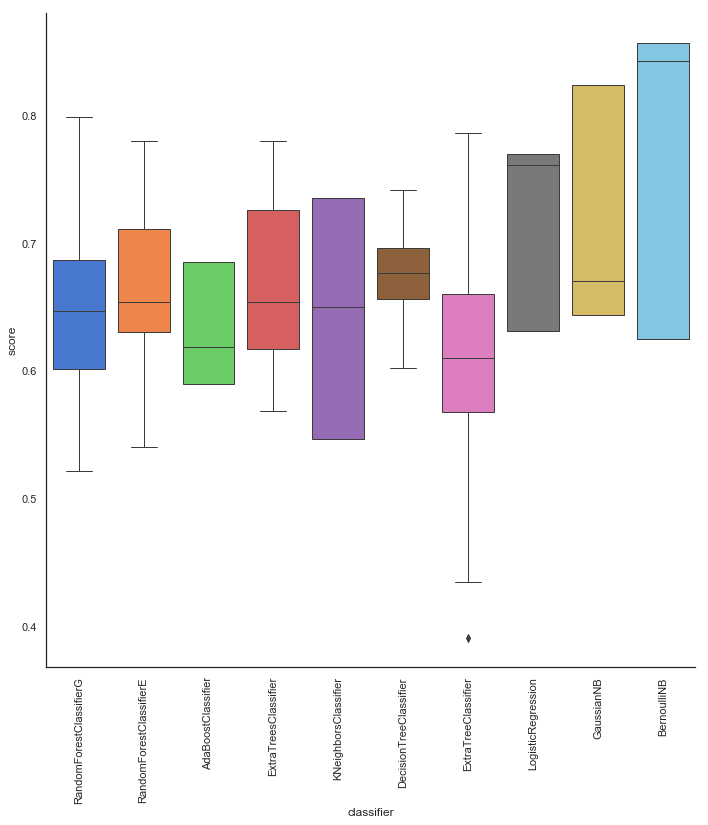

In [60]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
plt.figure(figsize=(15,10))
sns.factorplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1, 
               size = 10)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)